# Batman Who Laughs
 Nama Anggota :
* 1119004 - Calvin Jeremy
* 1119009 - Julian Ely K
* 1119015 - Valentinus Thiomarsel
* 1119025 - Azareel Fausan
* 1119028 - Aji Parama
* 1119047 - Andreas Jumaga

In [1]:
### Import
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()

In [2]:
car_raw = pd.read_csv("cars_dataset.csv")

In [3]:
print("data-frame shape: ", car_raw.shape)

data-frame shape:  (72435, 10)


In [4]:
print ("column names: ", car_raw.columns.values)

column names:  ['model' 'year' 'price' 'transmission' 'mileage' 'fuelType' 'tax' 'mpg'
 'engineSize' 'Make']


In [5]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(car_raw)
#prof.to_file(output_file='Eksplore.html')

# Data Cleaning

Pada tahap ini, kita akan memeriksa data yang bernilai null, data duplikat, dan outliers

### null data

Melakukan pembersihan data yang bernilai null

In [6]:
print("null values: \n"),
print(car_raw.isna())

null values: 

       model   year  price  transmission  mileage  fuelType    tax    mpg  \
0      False  False  False         False    False     False  False  False   
1      False  False  False         False    False     False  False  False   
2      False  False  False         False    False     False  False  False   
3      False  False  False         False    False     False  False  False   
4      False  False  False         False    False     False  False  False   
...      ...    ...    ...           ...      ...       ...    ...    ...   
72430  False  False  False         False    False     False  False  False   
72431  False  False  False         False    False     False  False  False   
72432  False  False  False         False    False     False  False  False   
72433  False  False  False         False    False     False  False  False   
72434  False  False  False         False    False     False  False  False   

       engineSize   Make  
0           False  False  
1     

In [7]:
print(car_raw.isna().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64


In [8]:
print("total null values: ", car_raw.isna().sum().sum())

total null values:  0


Setelah dicek, jumlah null values adalah 0, sehingga tidak perlu melakukan pembersihan data null

### Duplicate data

Pada bagian ini kita akan membersikan bagian data yang terduplikasi

In [9]:
duplicate_rows_df = car_raw[car_raw.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (842, 10)


Dapat kita lihat bahwa jumlah data yang terduplikat adalah 842

In [10]:
car_no_dupl = car_raw.drop_duplicates()
print ("shape of dataframe after dropping duplicates", car_no_dupl.shape)

shape of dataframe after dropping duplicates (71593, 10)


Kita drop yang kemudian jumlah keseluruhan data menjadi 71593

In [11]:
car_no_dupl.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
count,71593,71593.000000,71593.000000,71593,71593.000000,71593,71593.000000,71593.000000,71593.000000,71593
unique,146,NaN,NaN,4,NaN,5,NaN,NaN,NaN,7
top,Fiesta,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,Ford
freq,6508,NaN,NaN,42472,NaN,39844,NaN,NaN,NaN,17810
mean,NaN,2017.061500,16557.395625,NaN,23270.376084,NaN,116.859819,55.891774,1.636571,NaN
std,NaN,2.102418,9295.483474,NaN,21268.084737,NaN,64.169175,17.153909,0.562012,NaN
min,NaN,1996.000000,495.000000,NaN,1.000000,NaN,0.000000,0.300000,0.000000,NaN
25%,NaN,2016.000000,10160.000000,NaN,7373.000000,NaN,30.000000,47.900000,1.200000,NaN
50%,NaN,2017.000000,14490.000000,NaN,17689.000000,NaN,145.000000,55.400000,1.600000,NaN
75%,NaN,2019.000000,20192.000000,NaN,32548.000000,NaN,145.000000,62.800000,2.000000,NaN


### Outliers

Pada bagian ini kita mengecek satu per satu outliers untuk setiap variable numerikal

#### Outliers on Year

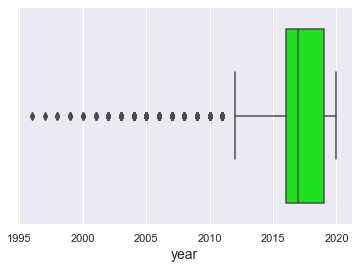

In [12]:
sns.boxplot(x=car_no_dupl['year'], color='lime')
plt.xlabel('year', fontsize=14)
plt.show()

Insight: Ditemukan outliers pada tahun 2010 kebawah. Kebanyakan mobil dalam data adalah mobil keluaran tahun 2016-2019, sehingga kebanyakan mobil tidak terbilang baru atau lama

#### Outliers on Price

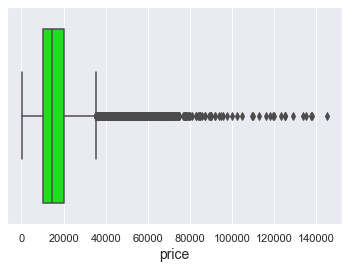

In [13]:
sns.boxplot(x=car_no_dupl['price'], color='lime')
plt.xlabel('price', fontsize=14)
plt.show()

Insight: Pada variable price, banyak sekali outliers di atas 40000. Sebesar 75% data mobil memiliki harga dibawah 20000, setengah dari nilai outliers terkecil

#### Outliers on mileage

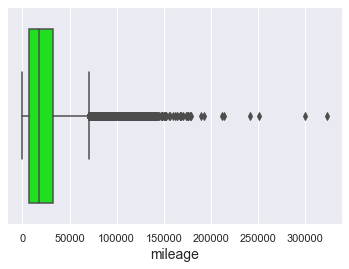

In [14]:
sns.boxplot(x=car_no_dupl['mileage'], color='lime')
plt.xlabel('mileage', fontsize=14)
plt.show()

Insight: Persebaran outliers dilihat pada nilai di atas 75000. Jarak yang telah dilalui oleh kebanyakan mobil ada di bawah 50000 mil, kemungkinan mobil jarang digunakan atau termasuk baru.

#### Outliers on tax


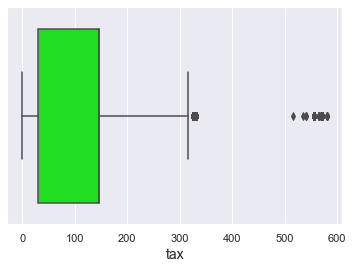

In [15]:
sns.boxplot(x=car_no_dupl['tax'], color='lime')
plt.xlabel('tax', fontsize=14)
plt.show()

Insight: Outliers pada tax ditemukan paling banyak pada range 500-600 dan ditemukan sedikit pada sekitaran 300. Kebanyakan mobil memiliki tax di bawah 150, kemungkinan kebanyakan mobil bukan mobil import.

#### Outliers MPG

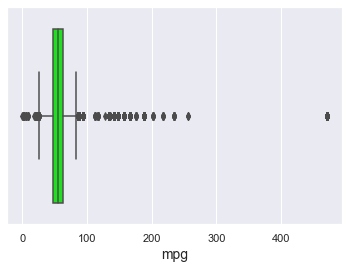

In [16]:
sns.boxplot(x=car_no_dupl['mpg'], color='lime')
plt.xlabel('mpg', fontsize=14)
plt.show()

Insight: Ditemukan outliers atas dan bawah, yang dimana outliers atas dengan range sekitar 100-300 dan sedikit ditemukan pada range di atas 400, outliers bawah pada range data >0 dan <100. Kebanyakan mobil memiliki kapasitas bahan bakar yang cukup rendah, yang mana 1 galon bahan bakar, kebanyakan mobil dapat menempuh sekitar 60 mil

#### Outliers Engine Size

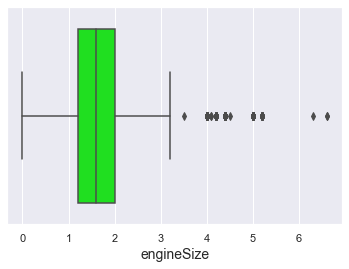

In [17]:
sns.boxplot(x=car_no_dupl['engineSize'], color='lime')
plt.xlabel('engineSize', fontsize=14)
plt.show()

Insight: Outliers pada engine size berkisar pada range sekitar 4-6. Ukuran mesin kebanyakan mobil ada di antara 1-2

In [18]:
print(car_no_dupl.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
Make             object
dtype: object


In [19]:
car_no_dupl_num = car_no_dupl.select_dtypes(exclude=['object'])
print("shape after excluding object columns: ", car_no_dupl_num.shape)

shape after excluding object columns:  (71593, 6)


In [20]:
car_Zscore = car_no_dupl_num[(np.abs(stats.zscore(car_no_dupl_num))<3).all(axis=1)]
print("shape after rejecting outliers: ", car_Zscore.shape)

shape after rejecting outliers:  (67982, 6)


Setelah menrejecting outliers maka mendpaatkan jumlah data sebagai berikut seperti diatas

### After using Z - Score

#### Data Year

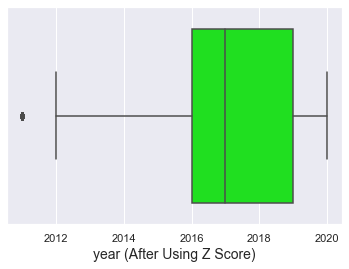

In [21]:
sns.boxplot(x=car_Zscore['year'], color='lime')
plt.xlabel('year (After Using Z Score)', fontsize=14)
plt.show()

Insight: Dapat kita bandingkan antara persebaran data outliers untuk variable years sebelum dan sesudah yaitu, pada bagian sesudah masih terdapat outliers namun jumlahnya berkurang secara signifikan sehingga kita hanya menggunakan mobil dari tahun 2011-2020. Kebanyakan mobil diproduksi pada tahun 2010 ke atas karena semakin cepat perkembangan teknologi yang menunjang produksi mobil dan dengan naiknya kebutuhan akan alat transportasi di dunia.

#### Data Price

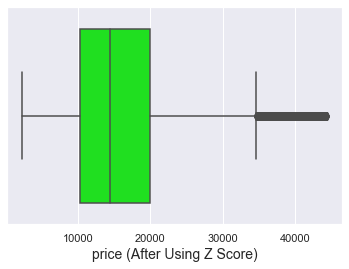

In [22]:
sns.boxplot(x=car_Zscore['price'], color='lime')
plt.xlabel('price (After Using Z Score)', fontsize=14)
plt.show()

Insight: Data price sebelum dan sesudah mengalami perubahan dari persebaran dan jumlahnya sehingga hanya menggunakan data mobil yang harganya di bawah 45000. Kebanyakan masyarakat menggunakan city cars yang lebih irit bahan bakar dengan harga yang lebih terjangkau. Kemungkinan untuk outliersnya yang telah dihapus terdiri dari mobil-mobil dengan model supercar dan support car.

#### Data Mileage

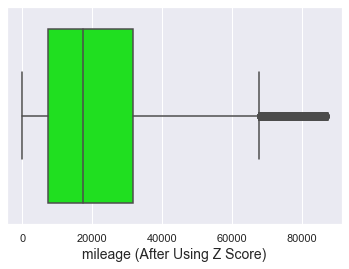

In [23]:
sns.boxplot(x=car_Zscore['mileage'], color='lime')
plt.xlabel('mileage (After Using Z Score)', fontsize=14)
plt.show()

Insight: Dengan melakukan data cleaning terhadap outliers, bisa kita lihat bahwa kisaran jarak tempuh mobil berada di nilai 0 sampai sekitar 90000.

#### Data tax

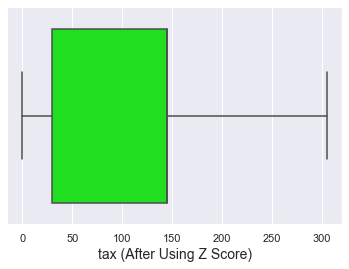

In [24]:
sns.boxplot(x=car_Zscore['tax'], color='lime')
plt.xlabel('tax (After Using Z Score)', fontsize=14)
plt.show()

Insight: Variable tax sudah tidak memiliki outliers. Pajak tertinggi menjadi sekitar 300

#### Data mpg

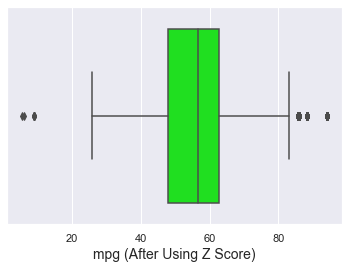

In [25]:
sns.boxplot(x=car_Zscore['mpg'], color='lime')
plt.xlabel('mpg (After Using Z Score)', fontsize=14)
plt.show()

Insight: Untuk mpg-nya sendiri, outliers yang begitu banyak dihilangkan dan dapat dilihat bahwa untuk jarak tempuh mobil dalam 1 galon bahan bakar kebanyakan dikisaran 25 sampai 83

#### Data EngineSize

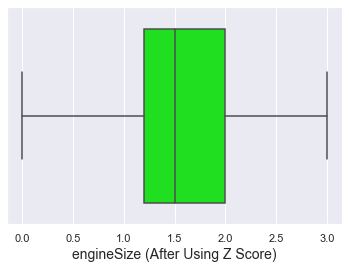

In [26]:
sns.boxplot(x=car_Zscore['engineSize'], color='lime')
plt.xlabel('engineSize (After Using Z Score)', fontsize=14)
plt.show()

Insight: Pada data enginesize sudah tidak ada outliers dengan rentang 0-3.0

In [27]:
car_Zscore.describe()

,year,price,mileage,tax,mpg,engineSize
count,67982.000000,67982.000000,67982.000000,67982.000000,67982.000000,67982.000000
mean,2017.187403,16003.969977,21788.280751,115.073549,55.616859,1.597070
std,1.761189,7430.214319,17963.631010,60.556386,10.936163,0.506611
min,2011.000000,2395.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,10298.000000,7445.000000,30.000000,47.900000,1.200000
50%,2017.000000,14463.000000,17411.000000,145.000000,56.500000,1.500000
75%,2019.000000,19995.000000,31501.000000,145.000000,62.800000,2.000000
max,2020.000000,44320.000000,87000.000000,305.000000,94.100000,3.000000


In [28]:
car_normal = pd.concat([car_no_dupl, car_Zscore], axis=1, join='inner')
car_normal = car_normal.loc[:, ~car_normal.columns.duplicated()]
car_normal.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
count,67982,67982.000000,67982.000000,67982,67982.000000,67982,67982.000000,67982.000000,67982.000000,67982
unique,121,NaN,NaN,4,NaN,5,NaN,NaN,NaN,7
top,Fiesta,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,Ford
freq,6407,NaN,NaN,41211,NaN,38705,NaN,NaN,NaN,17325
mean,NaN,2017.187403,16003.969977,NaN,21788.280751,NaN,115.073549,55.616859,1.597070,NaN
std,NaN,1.761189,7430.214319,NaN,17963.631010,NaN,60.556386,10.936163,0.506611,NaN
min,NaN,2011.000000,2395.000000,NaN,1.000000,NaN,0.000000,5.500000,0.000000,NaN
25%,NaN,2016.000000,10298.000000,NaN,7445.000000,NaN,30.000000,47.900000,1.200000,NaN
50%,NaN,2017.000000,14463.000000,NaN,17411.000000,NaN,145.000000,56.500000,1.500000,NaN
75%,NaN,2019.000000,19995.000000,NaN,31501.000000,NaN,145.000000,62.800000,2.000000,NaN


# Korelasi Numerikal

In [29]:
def correlation_2variables(x, y):
    plt.figure(figsize=[10,5])
    plt.scatter(x, y);
    print('pearson: ', stats.pearsonr(x, y))
    print('spearman: ', stats.spearmanr(x, y))

Pada bagian ini kita akan menentukan korelasi antar setiap variabel numerik,korelasi yang mau kita terapkan yaitu korelasi pearson dan korelasi spearman

### year & price

pearson:  (0.5680897945928591, 0.0)
spearman:  SpearmanrResult(correlation=0.5933535894623184, pvalue=0.0)


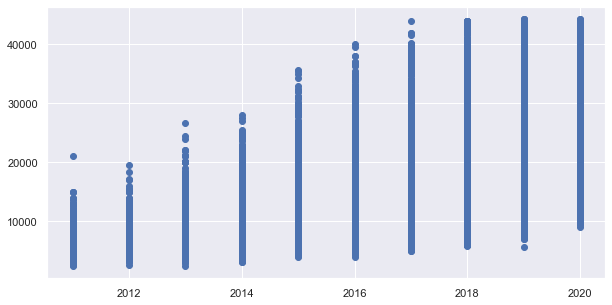

In [30]:
correlation_2variables(car_normal['year'], car_normal['price'])

Insight: Pada grafik di atas bisa dilihat harga jual mobil setiap tahunnya menaik dari tahun 2011 hingga tahun 2020. Pada tahun 2020 harga mobil paling rendah mendekati 10000 dollar. Dilihat dari korelasinya, korelasi bernilai positif dengan nilai spearman lebih besar sehingga kemungkinan korelasi tersebut monoton naik.

### year & mileage

pearson:  (-0.7446719247121887, 0.0)
spearman:  SpearmanrResult(correlation=-0.8016704842634652, pvalue=0.0)


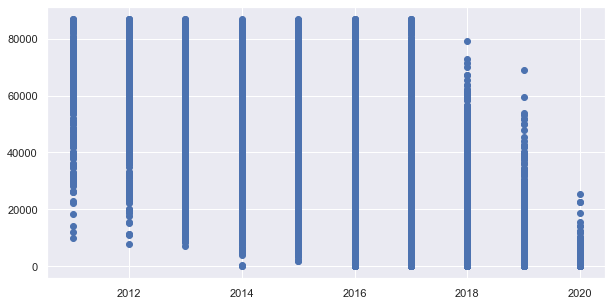

In [31]:
correlation_2variables(car_normal['year'], car_normal['mileage'])

Insight: Pada grafik di atas ini, bisa dilihat bahwa jarak tempuh suatu mobil untuk setiap tahunnya menurun dari tahun 2011 hingga tahun 2020. Pada tahun 2020 kilometer mobil bekas berkisar 30000 miles kebawah yang artinya lebih sedikit digunakan karena relatif termasuk mobil yang memiliki tahun lebih baru. Korelasi menggunakan nilai spearman dengan arah negatif sehingga korelasi tersebut monoton turun.

### year & tax

pearson:  (0.42973208962252574, 0.0)
spearman:  SpearmanrResult(correlation=0.3986919903391583, pvalue=0.0)


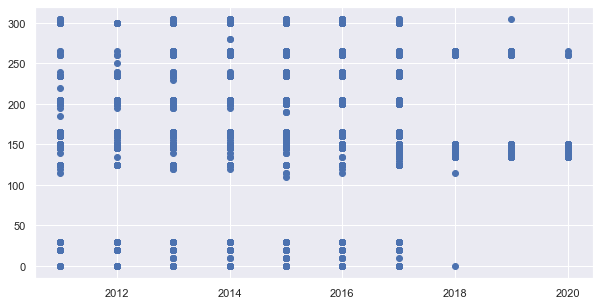

In [32]:
correlation_2variables(car_normal['year'], car_normal['tax'])

Insight: Pada grafik di atas, bisa tarik kesimpulan bahwa pajak suatu mobil untuk setiap tahunnya lebih mahal, dan signifikan berubah pada tahun 2018 yang dimana pajak paling banyak berkisar pada 150 dollar. Dilihat dari nilai pearsonnya, korelasi yang dihasilkan linier naik.

### year & mpg

pearson:  (-0.3201593128119157, 0.0)
spearman:  SpearmanrResult(correlation=-0.3746411092800368, pvalue=0.0)


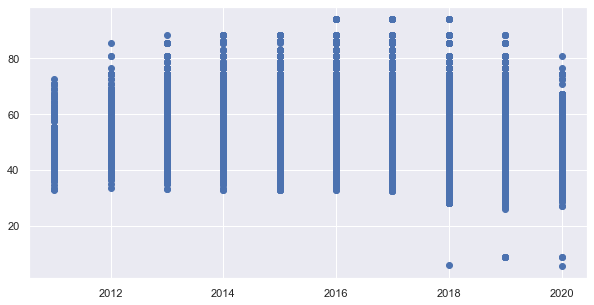

In [33]:
correlation_2variables(car_normal['year'], car_normal['mpg'])

Insight: Pada grafik di atas, bisa dilihat bahwa jarak tempuh dengan bahan bakar 1 galon pada mobil untuk setiap tahunnya mengalami sedikit kenaikan dari tahun 2011 hingga tahun 2017 dan mengalami penurunan pada tahun 2018 hingga 2020 dan bisa terlihat dari nilai spearmannya, korelasi berupa monoton turun.

### year & engineSize

pearson:  (-0.037902270454748976, 4.799026856099128e-23)
spearman:  SpearmanrResult(correlation=-0.024713693581281247, pvalue=1.1593967347716728e-10)


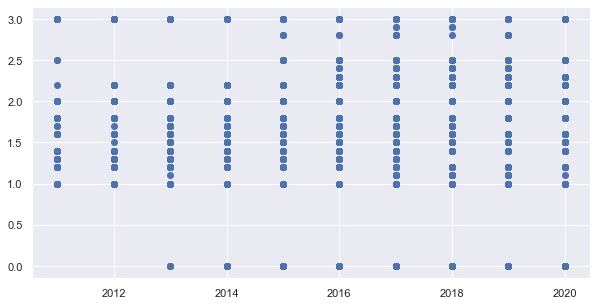

In [34]:
correlation_2variables(car_normal['year'], car_normal['engineSize'])

Insight: Pada grafik di atas, bisa dilihat bahwa ukuran mesin pada mobil sama sama saja untuk setiap tahunnya. Dilihat dari kedua nilai pearson dan nilai spearman yang sangat kecil mendekati 0, korelasi dari kedua variable hampir tidak ada.

### price & mileage

pearson:  (-0.44386862955040945, 0.0)
spearman:  SpearmanrResult(correlation=-0.49099270227904135, pvalue=0.0)


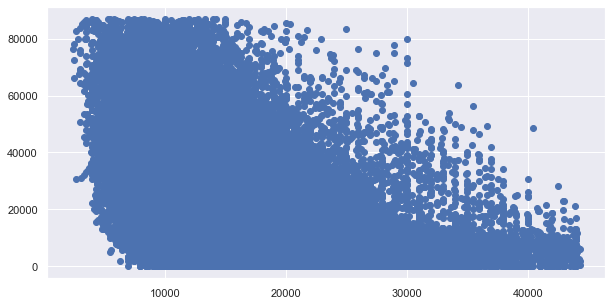

In [35]:
correlation_2variables(car_normal['price'], car_normal['mileage'])

Insight: Pada grafik diatas, bisa dilihat bahwa semakin banyak jarak tempuk suatu mobil maka harga jualnya pun akan murah, tetapi bila jarak tempuh suatu mobil sedikit maka harga jualnya pun mahal. Bisa dilihat dari nilai spearman, korelasinya monoton turun.

### price & tax

pearson:  (0.4298824536653344, 0.0)
spearman:  SpearmanrResult(correlation=0.4140535406297251, pvalue=0.0)


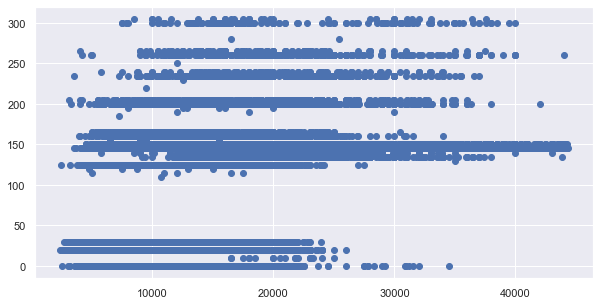

In [36]:
correlation_2variables(car_normal['price'], car_normal['tax'])

Insight: Pada grafik di atas, bisa dilihat kebanyakan pajak dikisaran 150 atau bisa dikatakan tetap walaupun harga jual mobil meningkat. Jika dilihat dari nilai pearson, korelasinya linier naik.

### price & mpg

pearson:  (-0.5535601959437887, 0.0)
spearman:  SpearmanrResult(correlation=-0.5415217021316345, pvalue=0.0)


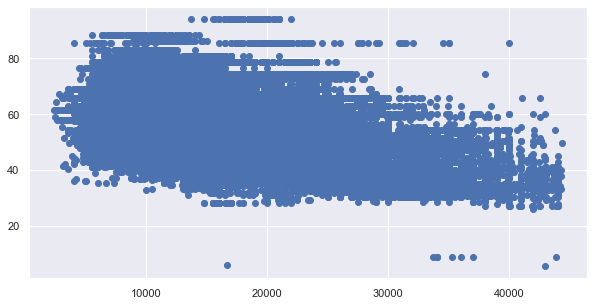

In [37]:
correlation_2variables(car_normal['price'], car_normal['mpg'])

Insight: Pada grafik di atas, bisa dilihat bahwa mpg mobil semakin berkurang sesuai harga yang semakin meningkat dan dilihat dari nilai pearson, korelasinya linier turun.

### price & engineSize

pearson:  (0.6019871055340733, 0.0)
spearman:  SpearmanrResult(correlation=0.601407335849138, pvalue=0.0)


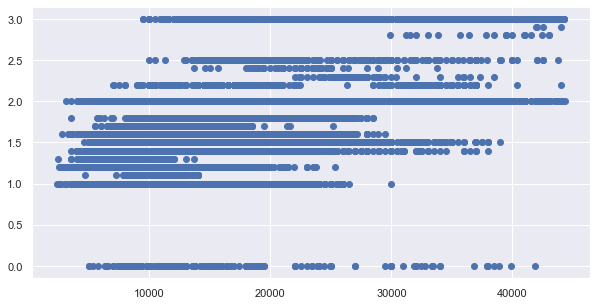

In [38]:
correlation_2variables(car_normal['price'], car_normal['engineSize'])

Insight: Pada grafik di atas, bisa dilihat bahwa ukuran mesin pada mobil semakin kecil maka harga jual mobil pun semakin murah apabila ukuran mesin besar maka harga jual mobil pun semakin mahal. Mobil bermesin 3.0 atau 3000cc memiliki harga paling murah di kisaran 10000 dollar sedangkan mobil dengan kapasitas 2000cc kebawah ada yang memiliki harga dibawah 10000 dollar, bisa terlihat dari nilai pearson, korelasinya linier naik.

### mileage & tax

pearson:  (-0.33778411307248624, 0.0)
spearman:  SpearmanrResult(correlation=-0.2988414898972668, pvalue=0.0)


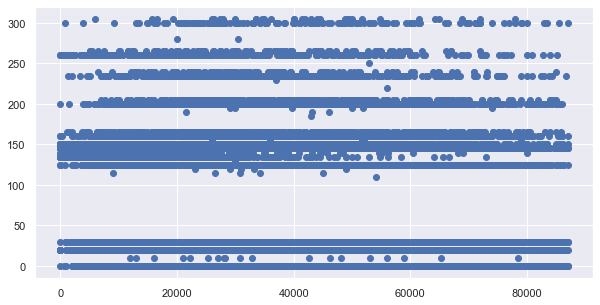

In [39]:
correlation_2variables(car_normal['mileage'], car_normal['tax'])

Insight: Pada grafik diatas, bisa dilihat bahwa kebanyakan pajak berkisaran paling banyak di nilai 150 atau bisa dikatakan nilainya tetap walaupun jarak tempuh mobil semakin banyak karena pajak mobil bergantung dari harganya dan tidak dipengaruhi oleh banyaknya kilometer. Tetapi dilihat dari korelasi pearson, hubungan kedua variable linier turun.

### mileage & mpg

pearson:  (0.31115527013259414, 0.0)
spearman:  SpearmanrResult(correlation=0.3651643712282985, pvalue=0.0)


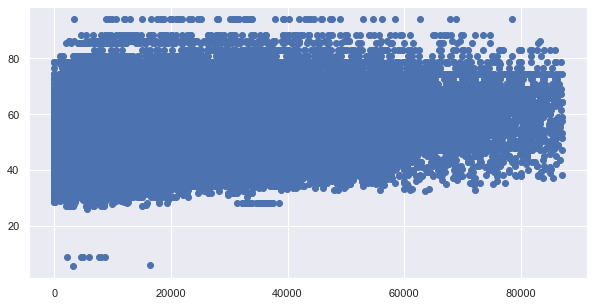

In [40]:
correlation_2variables(car_normal['mileage'], car_normal['mpg'])

Insight: Pada grafik diatas, bisa dilihat bahwa kisaran paling banyak ada di jarak tempuh angka 0 hingga 60000 dan juga mpg paling banyak di kisaran 30 - 80. Bisa dilihat dari nilai spearman, korelasinya monoton naik.

### mileage & engineSize

pearson:  (0.15167536014073785, 0.0)
spearman:  SpearmanrResult(correlation=0.10798336692187946, pvalue=2.0576134079413581e-175)


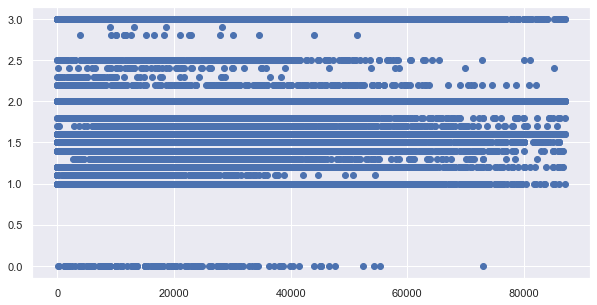

In [41]:
correlation_2variables(car_normal['mileage'], car_normal['engineSize'])

Insight: Pada grafik diatas, bisa dilihat bahwa ukuran mesin paling banyak ada di kisaran 1.0 hingga 1.8 atau bisa dikatakan nilainya tetap walaupun jarak tempuh yang semakin banyak. Hal ini menunjukkan mobil yang paling banyak dan sering digunakan adalah mobil dengan kapasitas mesin sebesar 1000cc hingga 1800cc. Dilihat dari korelasi pearson, hubungannya linier naik.

### tax & mpg

pearson:  (-0.5777088616928032, 0.0)
spearman:  SpearmanrResult(correlation=-0.5621195802029815, pvalue=0.0)


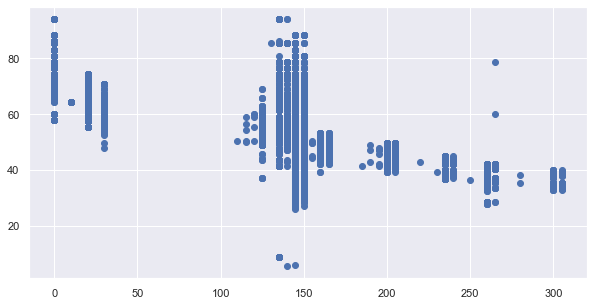

In [42]:
correlation_2variables(car_normal['tax'], car_normal['mpg'])

Insight: Pada grafik diatas, bisa dilihat bahwa mpg suatu mobil paling banyak ada dikisaran 30 hingga 80 dengan nilai pajak 150 dan dilihat dari nilai pearson, korelasinya linier turun.

### tax & engineSize

pearson:  (0.24964108092685502, 0.0)
spearman:  SpearmanrResult(correlation=0.1991545683063113, pvalue=0.0)


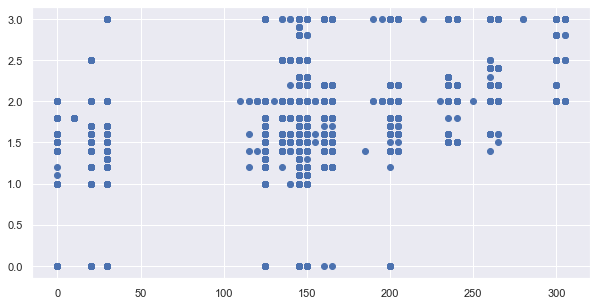

In [43]:
correlation_2variables(car_normal['tax'], car_normal['engineSize'])

Insight: Pada grafik diatas, bisa dilihat pajak suatu mobil paling banyak ada dikisaran 150 walaupun ukuran suatu mesin mobil semakin besar. Bisa dilihat dari nilai pearson, korelasinya linier naik.

### mpg & engineSize

pearson:  (-0.29840144541393854, 0.0)
spearman:  SpearmanrResult(correlation=-0.28311037724663085, pvalue=0.0)


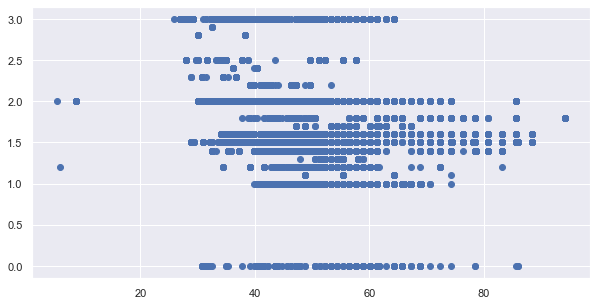

In [44]:
correlation_2variables(car_normal['mpg'], car_normal['engineSize'])

Insight: Pada grafik diatas, bisa dilihat bahwa ukuran mesin pada suatu mobil paling banyak ada pada kisaran 1.0 hingga 2.0 dengan mpg paling banyak ada dikisaran 30 hingga 70. Bisa dilihat dari nilai pearson, korelasi variablenya linier turun.

# Statistik Deskriptif

In [45]:
car_normal.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
count,67982,67982.000000,67982.000000,67982,67982.000000,67982,67982.000000,67982.000000,67982.000000,67982
unique,121,NaN,NaN,4,NaN,5,NaN,NaN,NaN,7
top,Fiesta,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,Ford
freq,6407,NaN,NaN,41211,NaN,38705,NaN,NaN,NaN,17325
mean,NaN,2017.187403,16003.969977,NaN,21788.280751,NaN,115.073549,55.616859,1.597070,NaN
std,NaN,1.761189,7430.214319,NaN,17963.631010,NaN,60.556386,10.936163,0.506611,NaN
min,NaN,2011.000000,2395.000000,NaN,1.000000,NaN,0.000000,5.500000,0.000000,NaN
25%,NaN,2016.000000,10298.000000,NaN,7445.000000,NaN,30.000000,47.900000,1.200000,NaN
50%,NaN,2017.000000,14463.000000,NaN,17411.000000,NaN,145.000000,56.500000,1.500000,NaN
75%,NaN,2019.000000,19995.000000,NaN,31501.000000,NaN,145.000000,62.800000,2.000000,NaN


Insight: Total data yang terdapat pada dataset adalah 67982 data. Nilai rata2 untuk tahun kendaraan adalah 2017, harga kisaran 16000 dollar, kilometer sebanyak 21788 miles, besaran pajak 115, konsumsi bahan bakar 55 miles per gallon, dan kapasitas mesin 1500cc hingga 1600cc. Mobil tertua yang ada pada dataset ini memiliki tahun produksi 2011 dan terbaru yaitu 2020, harga termurah berkisar 2000 dollar dan termahal pada 44000 dollar, kilometer mobil terendah yaitu 1 miles alias mobil baru dan terbanyak berkisar 87000 miles, pajak mobil termurah yaitu 0 (electric car) dan termahal yaitu sebesar 305 dollar, mobil terhemat memiliki konsumsi 5.5 miles per gallon dan terboros pada 94 miles per gallon, kapasitas mesin terkecil yaitu 0cc (electric car) dan terbesar adalah 3000cc.

## Sumber Penguat 
### Tax
#### -- https://www.moneyhelper.org.uk/en/everyday-money/buying-and-running-a-car/car-tax-bands-explained ---2017
#### --https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/175492/V149_rates_of_vehicle_tax.pdf

# Prediksi

### Prediksi akan dilakukan dengan cara regresi pada variable mpg.
mpg/miles per gallon adalah satuan konsumsi bahan bakar mobil yang dalam 1 gallon bahan bakar dapat menempuh n miles. Hal ini penting karena banyaknya penggunaan dan berkurangnya sumber bahan bakar minyak menyebabkan peningkatan harga bahan bakar tersebut. Selain itu juga, kebanyakan konsumer, khususnya kelas menengah ke bawah, yang membeli mobil lebih memperhatikan biaya perawatannya, termasuk biaya bahan bakarnya. Walaupun sekarang telah hadir mobil yang berbahan bakar listrik, nyatanya listrik dari tempat pengisian mobil tersebut masih memerlukan bahan bakar lain seperti batu bara dann tempat pengisian tersebut masih jarang ditemui di jalan-jalan. Listrik yang diperlukan juga sangat besar untuk melakukan pengisian di rumah. Sehingga mendorong sebagian besar masyarakat menengah ke bawah untuk lebih memilih mobil yang memiliki efisiensi bahan bakar yang baik. Maka, penting untuk mengetahui berapa mpg yang dapat diperoleh dari suatu mobil yang akan dibeli.